### Population and Sample

In [1]:
import pandas as pd 
data = pd.DataFrame()

In [2]:
data['Population'] = [12,34,62,53,43,49,32,82,33]

In [37]:
var1 = data['Population'].sample(20,replace=True) #here we can have repeated values while selecting
var2 = data['Population'].sample(9,replace=False) #here we can't have repeated values while selecting
#print(var1,var2)
type(var1)

pandas.core.series.Series

#### We take Mean Variance and Std Deviation of our values 

In [13]:
print('Mean',data['Population'].mean())
print('Var',data['Population'].var(ddof=0))
print('Std',data['Population'].std(ddof=0))
print('Size',data['Population'].shape[0])

Mean 44.44444444444444
Var 362.46913580246905
Std 19.038622213870127
Size 9


In [38]:
# Just Checking if the empirical 68-95-99 rule is applicable here :-)
#import matplotlib as plt
#Mean = data['Population'].mean()
#Std = data['Population'].std(ddof=0)
#count = 0
#for i in data['Population']:
#    if Mean-2*Std<i<Mean+2*Std:
#        count += 1
#        print(i)
#print(count/len(data['Population']))        

#### We take the same values for our sample data where we enabled replacement.  Note that .var(ddof=1) i.e while calculating variance we took n-1 in denominator instead of n
#### Here is a video to help you understand the statistical concept better[here](https://www.youtube.com/watch?v=wpY9o_OyxoQ)

In [10]:
print('Mean',var1.values.mean())
print('Var',var1.values.var(ddof=1))
print('Std',var1.values.std(ddof=1))
print('Size',var1.shape[0])

Mean 39.25
Var 406.4078947368421
Std 20.159560876587616
Size 20


#### We create two lists containing variance of 50 samples selected from our 9 population values. We repeat it so that we have 500 such values in each list. One with ddof=0 the other with ddof=1.

In [39]:
sample_length = 500
collection1  = [data['Population'].sample(50,replace=True).var(ddof=0) for i in range(sample_length)] 
collection2  = [data['Population'].sample(50,replace=True).var(ddof=1) for i in range(sample_length)]

In [41]:
print('Population Variance',data['Population'].var(ddof=0))
print('Avg variance when ddof=0',pd.DataFrame(collection1)[0].mean())
print('Avg variance when ddof=1',pd.DataFrame(collection2)[0].mean())

Population Variance 362.46913580246905
Avg variance when ddof=0 346.8611311999996
Avg variance when ddof=1 366.7076955102043


#### We observe ddof=1 works better 

In [42]:
# We want to test some theories regarding the moment of some particular stock price, commodity price or 
# any type of prediction that we have made regarding some portfolio.

In [109]:
import numpy as np  
fstsample = pd.DataFrame(np.random.normal(10,5,size=30)) 
#print(fstsample)

In [110]:
print('Mean',fstsample[0].mean())
print('StdDev',fstsample[0].std(ddof=1))

Mean 10.613771266748985
StdDev 5.740685083348704


In [111]:
meanlist = []
varlist = []
for i in range(1000):
    fstsample = pd.DataFrame(np.random.normal(10,5,size=30)) 
    meanlist.append(fstsample[0].mean())
    varlist.append(fstsample[0].var(ddof=1))

In [112]:
collection = pd.DataFrame()
collection['Mean Value'] = meanlist
collection['VarList Value'] = varlist

In [113]:
collection[0:2]

,Mean Value,VarList Value
0,10.742032,18.126778
1,10.657556,25.285990


In [116]:
# we plot the histogram of mean values and find that it almost fits normal distribution 

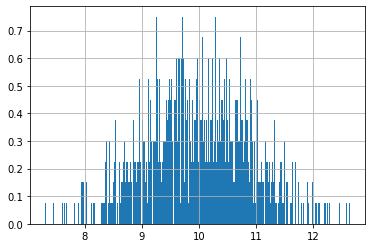

In [114]:
collection['Mean Value'].hist(bins=400,density=1)

In [ ]:
# However when we plot the histogram forthe variance values we find that it is skewed to the 
# right cmpared to the normal distribution

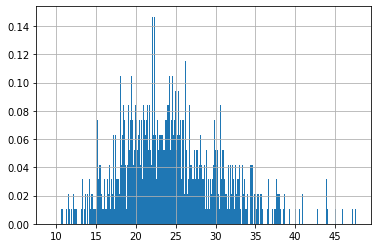

In [117]:
collection['VarList Value'].hist(bins=400,density=1)

In [125]:
# we compare the distribution of values of a particular sample and the mean 
# notice that with the rise of number of samples ,we approximately get the normal distribution from the values 

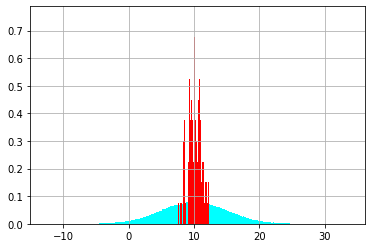

In [126]:
pop = pd.DataFrame(np.random.normal(10,5,size=500000))
pop[0].hist(color='cyan',bins=400,density=1)
collection['Mean Value'].hist(bins=400,density=1,color='red')

In [131]:
# This is the Central limit Theorem
# Take another example
# First we gona take a small sample size 

In [132]:
sample = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    samples = apop[0].sample(10,replace=True)
    sample.append(samples.mean())

acollec = pd.DataFrame()
acollec['MeanVal'] = sample

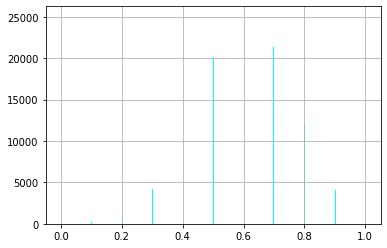

In [133]:
acollec['MeanVal'].hist(bins=400,color ='cyan')

In [134]:
# Now we take a bigger sample size

In [136]:
sample = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    samples = apop[0].sample(2000,replace=True)
    sample.append(samples.mean())

acollec = pd.DataFrame()
acollec['MeanVal'] = sample

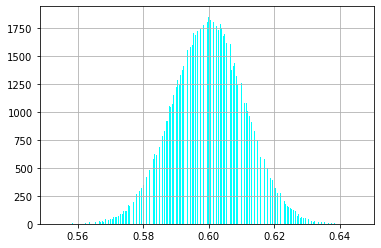

In [137]:
acollec['MeanVal'].hist(bins=400,color ='cyan')

In [138]:
# Hence we confirm the hypothesis of the CLT

In [168]:
from scipy.stats import norm
fb = pd.read_csv(r'../Week2/fb.csv') #importing the data set having facebook stock price data
fb['LogReturn'] = np.log(fb['Close'].shift(-1))-np.log(fb['Close'])

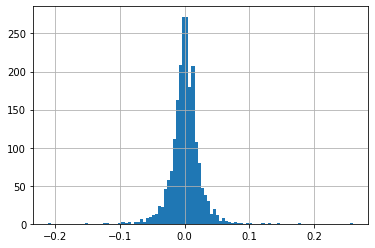

In [169]:
fb['LogReturn'].hist(bins=100)

In [170]:
# The method norm.ppf() takes a percentage and returns a standard deviation multiplier 
# for what value that percentage occurs at

In [171]:
z_left = norm.ppf(0.1) # we are asking it to provide the value at which we get 10% in a normal distribution curve 
z_right = norm.ppf(0.9)
sample_mean = fb['LogReturn'].mean() # mean of the sample 
sample_std = fb['LogReturn'].std(ddof=1)/(fb.shape[0])**0.5 # std dev
#print(z_left)
#print(z_right)

In [156]:
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std
print('80% confidence interval is ')
print(interval_left,interval_right)

80% confidence interval is 
0.00027153725424113094 0.0015848683452107139


In [224]:
print(fb['LogReturn'].std(ddof=1))
l = [4,4,6,8,8]
l = pd.DataFrame(l)
e = []
for i in range(1000):
    val = pd.DataFrame(l.sample(1000,replace=True))
    mean = e.append(val.mean())
df = pd.DataFrame(e)   

0.023346501971697856


0    6.000526
dtype: float64


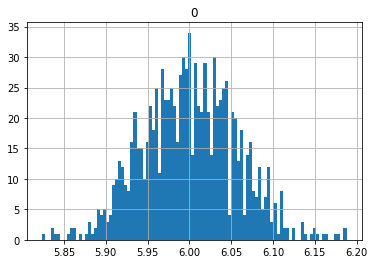

In [220]:
df.hist(bins=100)
print(df.mean())

In [221]:
for i in range(len(e)):
    e[i] = e[i]-df.mean()
    e[i] = e[i]/df.std(ddof=1)
print(e[:10])    

[0    0.345208
dtype: float64, 0    0.026129
dtype: float64, 0    0.238849
dtype: float64, 0    0.345208
dtype: float64, 0    0.132489
dtype: float64, 0   -0.718389
dtype: float64, 0    0.238849
dtype: float64, 0   -0.18659
dtype: float64, 0   -0.39931
dtype: float64, 0   -0.29295
dtype: float64]


In [222]:
df2 = pd.DataFrame(e)

0    3.443468e-15
dtype: float64


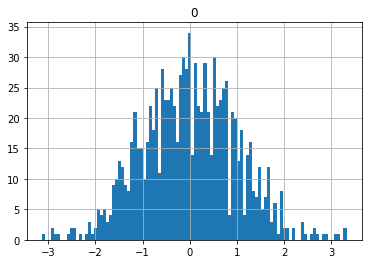

In [223]:
df2.hist(bins=100)
print(df2.mean())